In [1]:
from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})



{'Cell': {'cm_config': {'lineNumbers': True}},
 'CodeCell': {'cm_config': {'autoCloseBrackets': False}},
 'keys': {'command': {'bind': {'shift-r': 'jupyter-notebook:restart-kernel-and-run-all-cells'}}}}

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette('colorblind')
%matplotlib inline

In [2]:

#with arfefact removed
remove_arr = np.load('/home/jamesrowland/Desktop/j031/4/artifactRemoved/suite2p/plane0/F.npy')
remove_arr.shape

(240, 1942)

In [3]:
#without artefact removal
noremove_arr = np.load('/home/jamesrowland/Desktop/j031/4/suite2p/plane0/F.npy')
noremove_arr.shape

(195, 1942)

In [4]:
#find same cells across both extraction methods
#cells centred on: [(379,291), (384,162), (238,322)]

#index of above cells in removed condition
remove_idx = [1,33,10]

#index of cells in non-removed condition
noremove_idx = [3, 35, 10]

In [14]:
remove_traces = remove_arr[remove_idx, :]
noremove_traces = noremove_arr[noremove_idx, :]
num_cells = len(remove_traces)

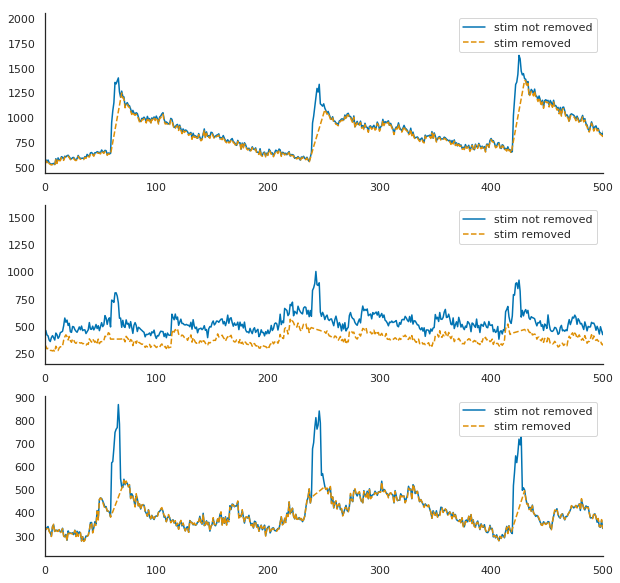

In [30]:
plt.figure(figsize=(10,10))
for unit in range(num_cells):  
    
    plt.subplot(num_cells,1,unit+1)
    
    plt.plot(noremove_traces[unit], label='stim not removed')
    plt.plot(remove_traces[unit], '--', label='stim removed')
    plt.legend()
    plt.xlim((0,500))
    
sns.despine()


In [ ]:
def dfof(arr):
    
    dfof_arr = []
    
    for trace in arr:
        F = np.min(trace)

        dfof_arr.append([(f - F) / F for f in trace])
        
    return np.array(dfof_arr)
